In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets,linear_model

In [26]:
data = pd.read_csv('StudentsPerformance.csv')

In [27]:
dt = data.drop(['gender'], axis=1)
y = dt['PassedExam']
y

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: PassedExam, Length: 1000, dtype: int64

In [28]:
x = dt.drop(['PassedExam','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
x

,RK1,RK2,RK3
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.5)
print(X_train)
print()
print(Y_train)

     RK1  RK2  RK3
566   92  100  100
409   87   84   85
629   44   51   55
926   64   56   52
44    50   56   54
..   ...  ...  ...
419   57   56   54
119   55   69   65
291   86   73   70
562   96   90   92
495   68   64   66

[500 rows x 3 columns]

566    1
409    1
629    0
926    0
44     0
      ..
419    0
119    0
291    1
562    1
495    0
Name: PassedExam, Length: 500, dtype: int64


In [30]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
Y_pred = LR.predict(X_valid)
Y_pred = np.rint(Y_pred).astype('int')
Y_pred

array([ 1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,
        0, -1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,
        1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0, -1,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,
        1,  1, -1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,
        1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  1,  0, -1, -1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
       -1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,
       -1,  1,  1,  1,  0,  0,  1,  0,  1, -1,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  1,  0

In [32]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_valid, Y_pred))
print(metrics.mean_squared_error(Y_valid, Y_pred))

0.1
0.1


In [36]:
LR.coef_

array([0.00837118, 0.01455272, 0.00399093])

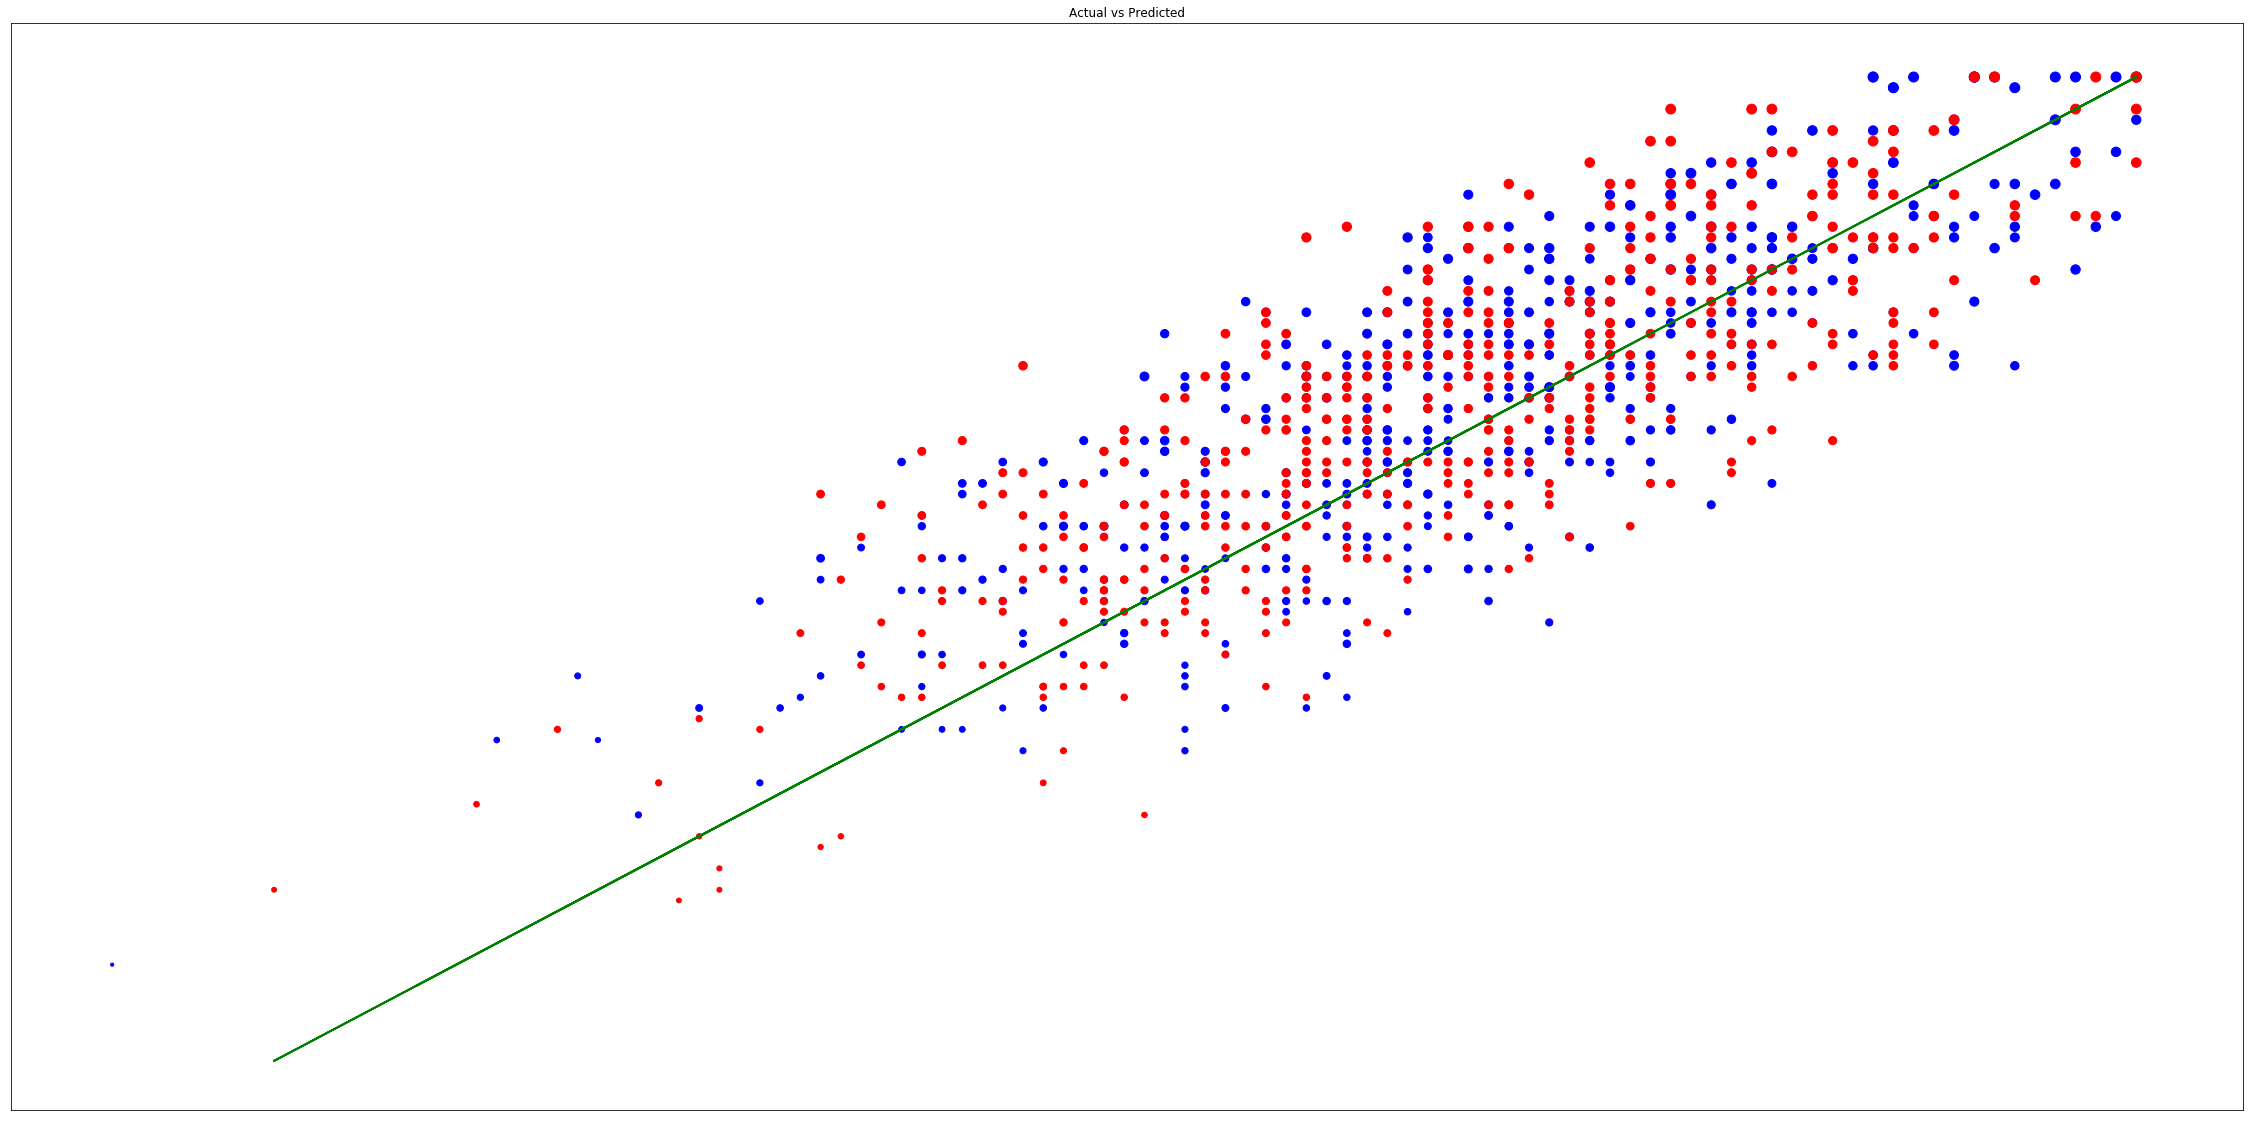

In [34]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


plt.figure(figsize=(40, 20))
plt.title('Actual vs Predicted')
plt.scatter(X_train['RK1'],X_train['RK2'],X_train['RK3'], color ='b') 
plt.scatter(X_valid['RK1'], X_valid['RK2'],X_valid['RK2'], color ='r') 
plt.plot(X_valid,X_valid , color='g',linewidth=2)  
plt.xticks(())
plt.yticks(())
plt.show() 

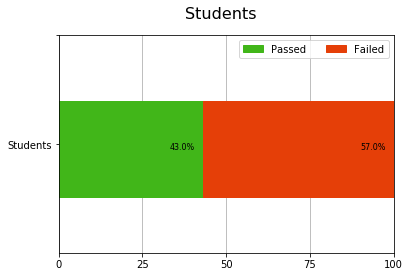

In [35]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

passedExam = data["PassedExam"].value_counts()

start = 0
passed = passedExam.values[1]
failed = passedExam.values[0]

all_len = passed + failed
passed_p = round((100 * passed) / all_len)
failed_p = round((100 * failed) / all_len)

ax.broken_barh([(start, passed_p), (passed_p, passed_p+failed_p)], [10, 9], facecolors=('#41B619', '#E53F08'))
ax.set_ylim(5, 15)
ax.set_xlim(0, 100)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.set_yticks([15, 25])
ax.set_xticks([0, 25, 50, 75, 100])

ax.set_axisbelow(True) 

ax.set_yticklabels(['Students'])
ax.grid(axis='x')
ax.text(passed_p-10, 14.5 , str(passed_p)+"%", fontsize=8)
ax.text((passed_p+failed_p)-10, 14.5, str(failed_p)+"%", fontsize=8)

fig.suptitle('Students', fontsize=16)

leg1 = mpatches.Patch(color='#41B619', label='Passed')
leg2 = mpatches.Patch(color='#E53F08', label='Failed')
ax.legend(handles=[leg1, leg2], ncol=2)

plt.show()